In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Source the data.
# The link is only available to the user themselves, so for the person reading this, the link will not work. Sorry!  
# url = "https://rateyourmusic.com/user_albums_export?album_list_id=480278&noreview"


In [21]:
# Per the above, we have to access the data locally.
df = pd.read_csv("rymdata.txt")
df.head()

,RYM Album,First Name,Last Name,First Name localized,Last Name localized,Title,Release_Date,Rating,Ownership,Purchase Date,Media Type,Review
0,710349,NaN,!!!,NaN,NaN,Myth Takes,2007,8,n,NaN,NaN,""""""
1,882961,NaN,047,NaN,NaN,Robopop (Vi tar CD:n dit vi kommer),2006,7,n,NaN,NaN,""""""
2,1832312,NaN,Afasi &amp; Filthy,NaN,NaN,Fläcken,2008,7,n,NaN,NaN,""""""
3,167500,The,Album Leaf,NaN,NaN,In a Safe Place,2004,8,n,NaN,NaN,""""""
4,6321843,NaN,Anekdoten,NaN,NaN,Until All the Ghosts Are Gone,2015,7,n,NaN,NaN,""""""


In [22]:
# Explore the data types
df.dtypes

RYM Album                 int64
 First Name              object
Last Name                object
First Name localized    float64
 Last Name localized     object
Title                    object
Release_Date              int64
Rating                    int64
Ownership                object
Purchase Date           float64
Media Type               object
Review                   object
dtype: object

In [23]:
# Get the shape of the df
df.shape

(930, 12)

In [24]:
# Determine what columns can be dropped based on how many NaN values there are within each column
df.isna().sum()

RYM Album                 0
 First Name             861
Last Name                 0
First Name localized    930
 Last Name localized    928
Title                     0
Release_Date              0
Rating                    0
Ownership                 0
Purchase Date           930
Media Type              871
Review                    0
dtype: int64

In [25]:
# Drop unneeded columns
df.drop(['First Name localized', 'Ownership', 'Purchase Date', 'Media Type', 'Review'], axis=1, inplace = True)

In [26]:
df

,RYM Album,First Name,Last Name,Last Name localized,Title,Release_Date,Rating
0,710349,NaN,!!!,NaN,Myth Takes,2007,8
1,882961,NaN,047,NaN,Robopop (Vi tar CD:n dit vi kommer),2006,7
2,1832312,NaN,Afasi &amp; Filthy,NaN,Fläcken,2008,7
3,167500,The,Album Leaf,NaN,In a Safe Place,2004,8
4,6321843,NaN,Anekdoten,NaN,Until All the Ghosts Are Gone,2015,7
...,...,...,...,...,...,...,...
925,4058235,The,World Is a Beautiful Place &amp; I Am No Longe...,NaN,"Whenever, If Ever",2013,7
926,2698,NaN,Yo La Tengo,NaN,Electr-o-Pura,1995,5
927,10133,Frank,Zappa,NaN,Apostrophe ('),1974,8
928,7732162,NaN,假假條,Jajatao,The Rite of Spring,2016,7


In [27]:
# Explore the dataset when grouping by rating
df.groupby('Last Name').mean().sort_values(by="Rating", ascending=False)
# De La Soul at 0.0 looks off, as the rating scale on RYM goes from 1 to 10

,RYM Album,Release_Date,Rating
Last Name,,,
Sex Pistols,64213.0,1976.0,10.0
Buddy Holly / The Crickets,57406.0,1978.0,10.0
Charles Mingus,11222.0,1959.0,10.0
J Dilla,398852.0,2006.0,10.0
The Stone Roses,314.0,1989.0,10.0
...,...,...,...
Keaton Henson,3637404.0,2011.0,5.0
The 13th Floor Elevators,7807.0,1966.0,4.0
Oasis,33.0,1994.5,4.0


In [28]:
# RYM tracks owned, but unrated, albums as a rate of 0.0. To avoid them messing up our dataset, we drop the rows where Rating is 0
df = df[df['Rating'] != 0]

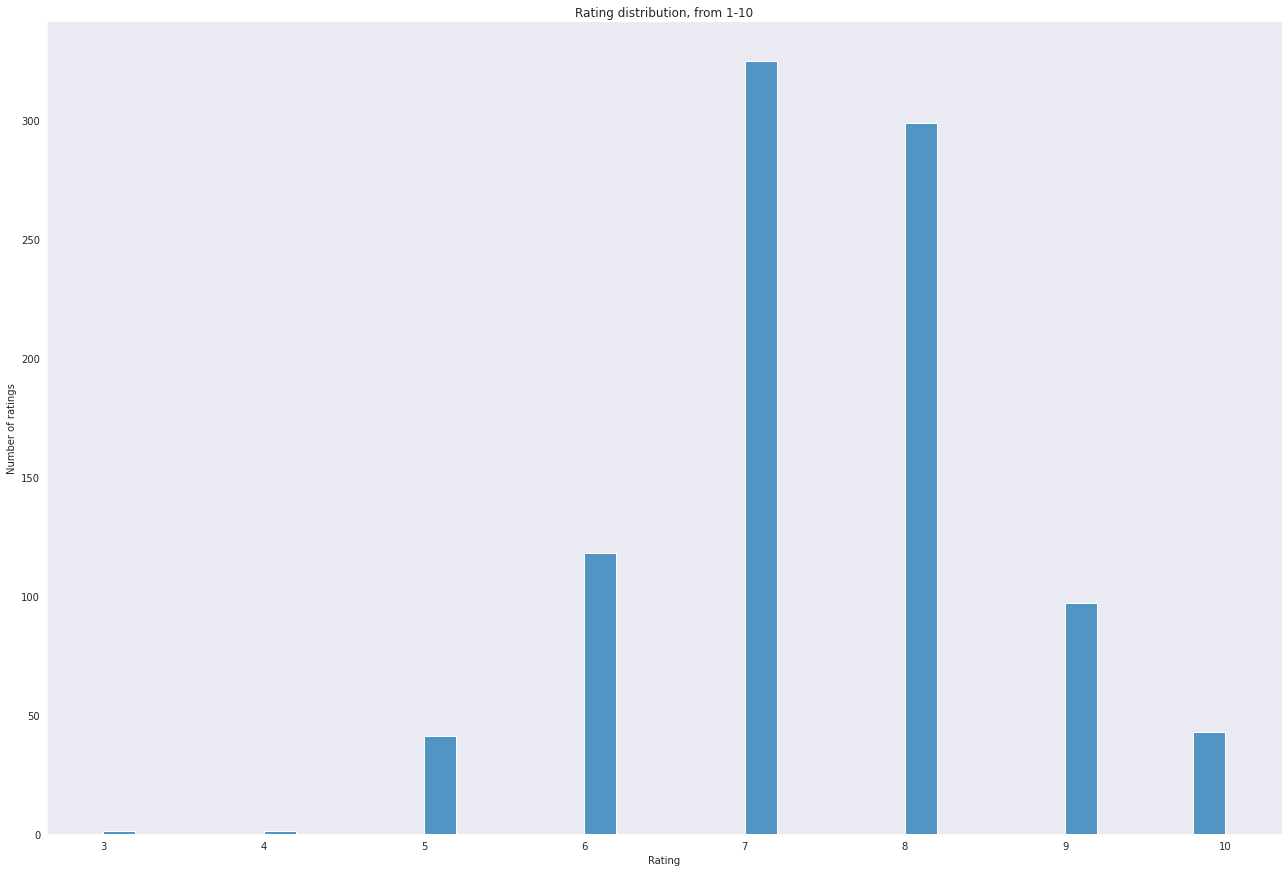

In [29]:
# Plot the rating distribution 
sns.set_style('dark')
sns.displot(x = df.Rating, height=12, aspect=18/12)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Rating distribution, from 1-10')

plt.show()

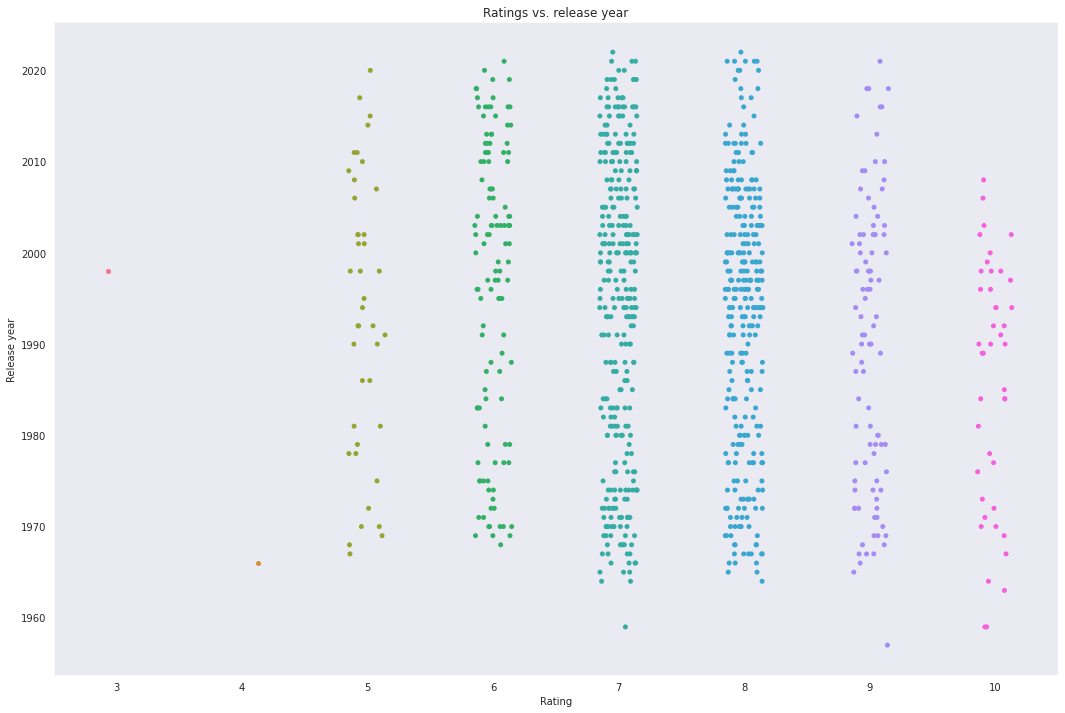

In [30]:
# Visualize the ratings vs. release year
plt.figure(figsize=(18,12))
sns.stripplot(data = df, x = "Rating", y = "Release_Date", jitter=0.15, palette="husl")
plt.title('Ratings vs. release year')
plt.xlabel('Rating')
plt.ylabel('Release year')
plt.show()
# No glaring trends observed

In [31]:
# Store the aggregated table that we had created previously 
counttable = df.groupby('Last Name').count().sort_values(by='Rating', ascending=False)

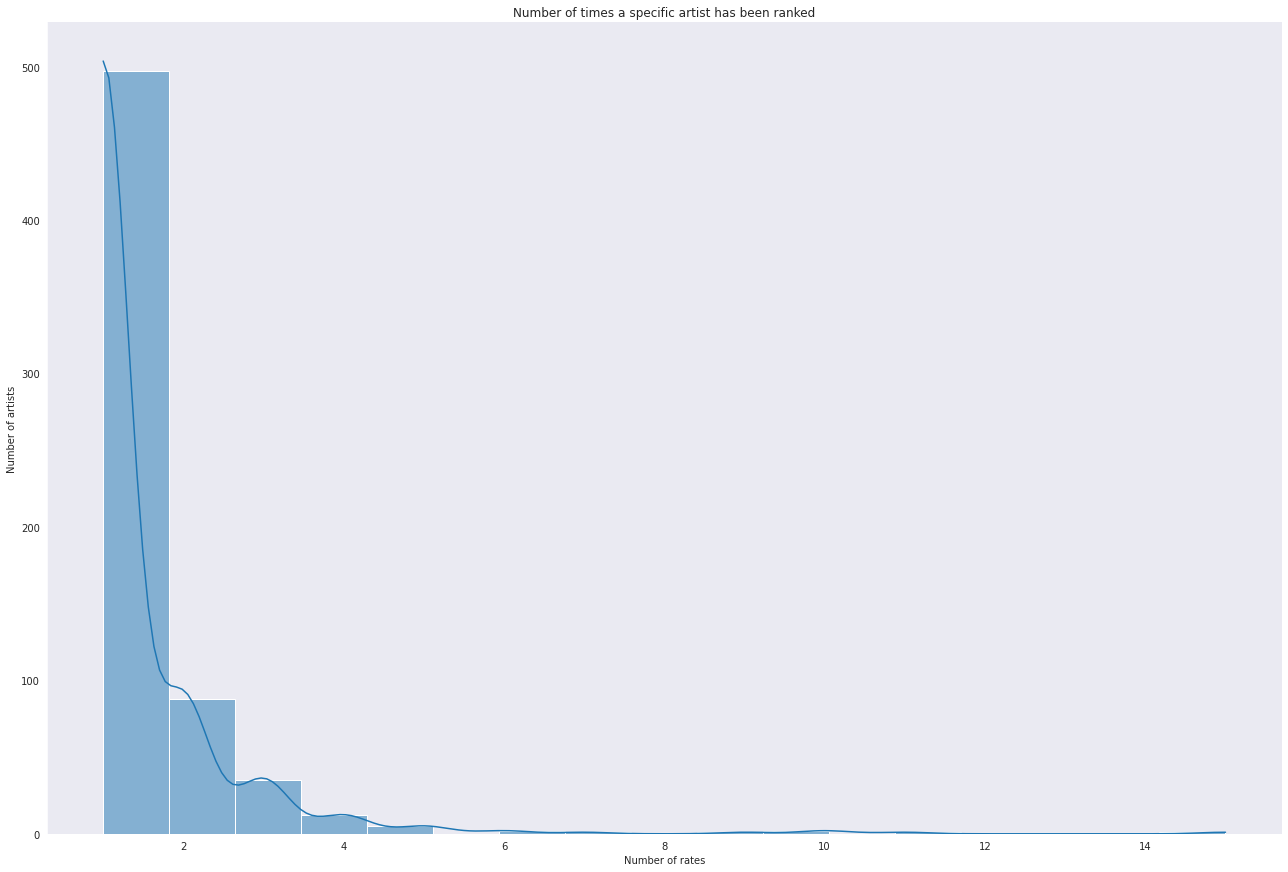

In [32]:
# Visualize how often any given artist within the dataset has gotten rated
sns.displot(data = counttable, x = 'Rating', bins=17, kind = "hist", kde=True, height = 12, aspect = 18/12)
plt.title('Number of times a specific artist has been ranked')
plt.xlabel('Number of rates')
plt.ylabel('Number of artists')
plt.show()
# It is very clear that most artists only get rated once

In [33]:
# Create a table where only artists that have been rated at least twice are included
twotimes = df.groupby('Last Name')[['Rating', 'Release_Date']].mean()[df.groupby('Last Name').count()['Rating'] >= 2].sort_values(by='Rating', ascending=False)
twotimes

,Rating,Release_Date
Last Name,,
T. Rex,9.5,1971.5
The Jimi Hendrix Experience,9.5,1968.0
Kite,9.0,2011.5
Massive Attack,9.0,1995.8
The Knife,9.0,2004.0
...,...,...
The National,6.0,2008.5
The Mothers of Invention,6.0,1967.0
Beach House,6.0,2012.5


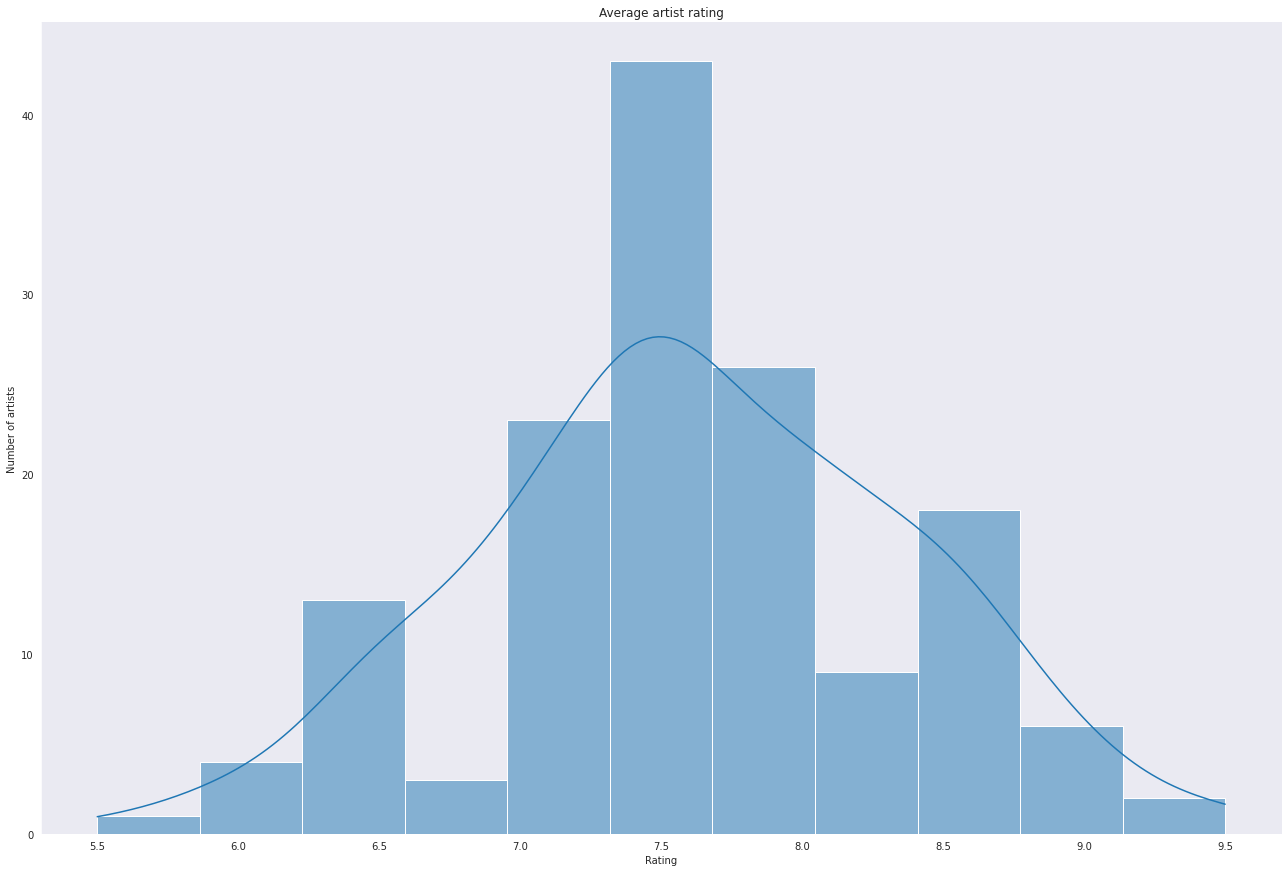

In [34]:
# Visualize average rating for artists rated twice or more
sns.displot(data = twotimes, x = 'Rating', height=12, aspect=18/12, kde=True)
plt.title('Average artist rating')
plt.xlabel('Rating')
plt.ylabel('Number of artists')
plt.show()